In [54]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [55]:
output_files = [ filename for filename in os.listdir('./optimization_folder/') \
                    if filename.startswith('run_libensemble_history')
                   and filename.endswith('.npy')]
assert len(output_files) == 1

x  = np.load( os.path.join('./optimization_folder/', output_files[0]) )
d = { label: x[label].flatten() for label in x.dtype.names if label not in ['x', 'x_on_cube'] }
df = pd.DataFrame(d)

In [56]:
df

,returned,gen_worker,given_back,sim_id,given_time,f,x1,x0,sim_worker,given,gen_time
0,True,1,True,0,1.602824e+09,59.973942,6.370201,2.455814,2,True,1.602824e+09
1,True,1,True,1,1.602824e+09,-2.432110,2.413311,4.078436,3,True,1.602824e+09
2,True,1,True,2,1.602824e+09,-346.688493,12.581734,11.894258,2,True,1.602824e+09
3,True,1,True,3,1.602824e+09,-20.383488,4.047411,13.214993,3,True,1.602824e+09
4,True,1,True,4,1.602824e+09,-105.119385,10.381425,7.088761,2,True,1.602824e+09
5,True,1,True,5,1.602824e+09,-203.013018,7.411653,13.201038,3,True,1.602824e+09
6,True,1,True,6,1.602824e+09,-64.941380,0.272890,11.156973,2,True,1.602824e+09
7,True,1,True,7,1.602824e+09,33.917657,0.015189,2.870188,3,True,1.602824e+09
8,True,1,True,8,1.602824e+09,-200.460015,11.368613,5.904689,2,True,1.602824e+09
9,True,1,True,9,1.602824e+09,-188.313062,14.863648,11.498135,3,True,1.602824e+09


In [57]:
objective = lambda x: -(x[0] + 10*np.cos(x[0]))*(x[1] + 5*np.cos(x[1]) )                                

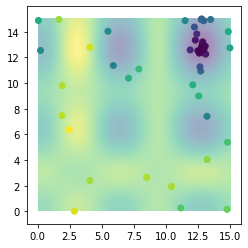

In [58]:
pts_x, pts_y = np.meshgrid( np.linspace(0, 15, 200), np.linspace(0, 15, 200), indexing='ij' )
X = np.stack( (pts_x.flatten(), pts_y.flatten()) ) 
values = objective( X )
plt.imshow( values.reshape(pts_x.shape).T, origin='lower', alpha=0.5, extent=[0,15,0,15])
plt.scatter( df['x0'], df['x1'], c=df['f'])

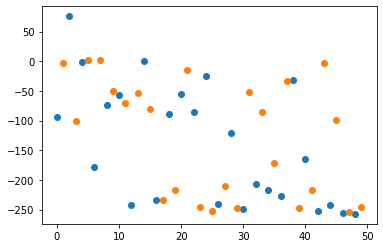

In [35]:
plt.plot(df['f'][df['sim_worker']==2], 'o')
plt.plot(df['f'][df['sim_worker']==3], 'o')

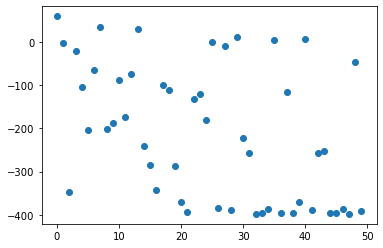

In [59]:
plt.plot(df['f'], 'o')